In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
metrics = pd.read_csv(r"C:\Users\teppo\Desktop\nlp_hw3\results\metrics.csv")
plots_folder = r"C:\Users\teppo\Desktop\nlp_hw3\results\plots"

In [19]:
# Create summary table safely
summary_table = metrics[['Model', 'Activation', 'Optimizer', 'SeqLen', 'GradClip', 'Accuracy', 'F1', 'EpochTime(s)']].copy()
summary_table['Accuracy'] = summary_table['Accuracy'].round(2)
summary_table['F1'] = summary_table['F1'].round(2)
summary_table['EpochTime(s)'] = summary_table['EpochTime(s)'].round(1)

# Save summary table
summary_table.to_csv(r"C:\Users\teppo\Desktop\nlp_hw3\results\summary_table.csv", index=False)

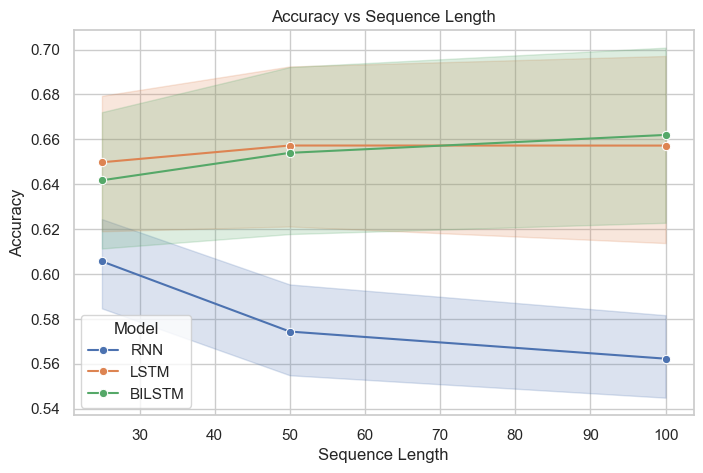

In [20]:
# -----------------------------
# Plot 1: Accuracy vs Sequence Length
# -----------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.lineplot(data=metrics, x='SeqLen', y='Accuracy', hue='Model', marker='o')
plt.title("Accuracy vs Sequence Length")
plt.xlabel("Sequence Length")
plt.ylabel("Accuracy")
plt.savefig(os.path.join(plots_folder, "accuracy_vs_seq.png"), dpi=300)
plt.show()

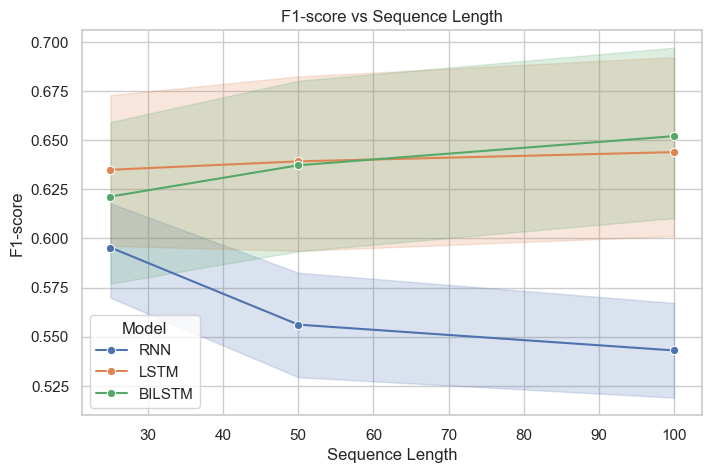

In [21]:
# -----------------------------
# Plot 2: F1-score vs Sequence Length
# -----------------------------
plt.figure(figsize=(8,5))
sns.lineplot(data=metrics, x='SeqLen', y='F1', hue='Model', marker='o')
plt.title("F1-score vs Sequence Length")
plt.xlabel("Sequence Length")
plt.ylabel("F1-score")
plt.savefig(os.path.join(plots_folder, "f1_vs_seq.png"), dpi=300)
plt.show()

In [22]:
# -----------------------------
# Identify best and worst models by Accuracy
# -----------------------------
best_model = metrics.loc[metrics['Accuracy'].idxmax()]
worst_model = metrics.loc[metrics['Accuracy'].idxmin()]

# Print details
print("===== Best Model =====")
print(f"Model: {best_model['Model']}")
print(f"Activation: {best_model['Activation']}")
print(f"Optimizer: {best_model['Optimizer']}")
print(f"Sequence Length: {best_model['SeqLen']}")
print(f"Accuracy: {best_model['Accuracy']}")
print(f"F1-score: {best_model['F1']}\n")

print("===== Worst Model =====")
print(f"Model: {worst_model['Model']}")
print(f"Activation: {worst_model['Activation']}")
print(f"Optimizer: {worst_model['Optimizer']}")
print(f"Sequence Length: {worst_model['SeqLen']}")
print(f"Accuracy: {worst_model['Accuracy']}")
print(f"F1-score: {worst_model['F1']}\n")

# -----------------------------
# Filter logs for best and worst models
# -----------------------------
best_logs = metrics[(metrics['Model'] == best_model['Model']) &
                    (metrics['SeqLen'] == best_model['SeqLen']) &
                    (metrics['Activation'] == best_model['Activation']) &
                    (metrics['Optimizer'] == best_model['Optimizer'])]

worst_logs = metrics[(metrics['Model'] == worst_model['Model']) &
                     (metrics['SeqLen'] == worst_model['SeqLen']) &
                     (metrics['Activation'] == worst_model['Activation']) &
                     (metrics['Optimizer'] == worst_model['Optimizer'])]


===== Best Model =====
Model: LSTM
Activation: relu
Optimizer: adam
Sequence Length: 100
Accuracy: 0.8144
F1-score: 0.8144

===== Worst Model =====
Model: RNN
Activation: relu
Optimizer: sgd
Sequence Length: 50
Accuracy: 0.4997
F1-score: 0.346



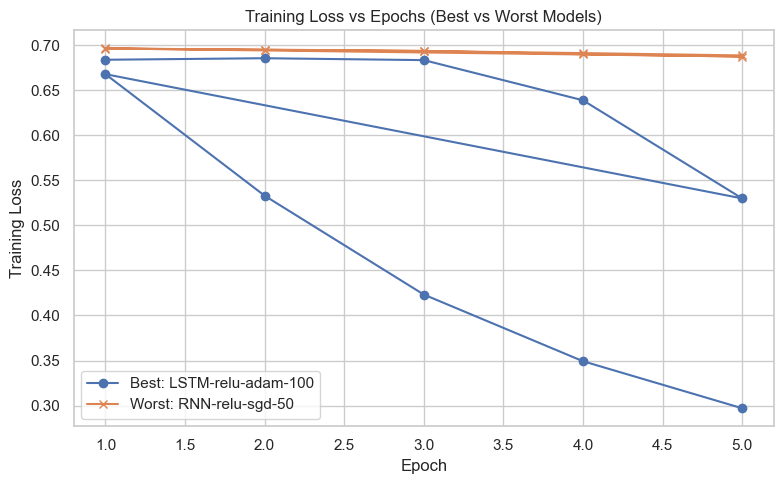

In [23]:
# -----------------------------
# Plot 3: Training Loss vs Epochs (Best/Worst models)
# -----------------------------

plt.figure(figsize=(8,5))
plt.plot(best_logs['Epoch'], best_logs['Loss'], marker='o', label='Best: LSTM-relu-adam-100')
plt.plot(worst_logs['Epoch'], worst_logs['Loss'], marker='x', label='Worst: RNN-relu-sgd-50')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs (Best vs Worst Models)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, "loss_best_worst.png"), dpi=300)
plt.show()
